## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

##Notas EP : Did you include the requirements seaborn file?

In [2]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.1 MB/s eta 0:00:00


In [11]:
!pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 36.5 MB/s eta 0:00:0000:0100:01


In [1]:
#Notas Import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # EP Value in cero in graph
from matplotlib.ticker import StrMethodFormatter
from ipyleaflet import Map, basemaps, CircleMarker, Marker




In [2]:
#Read file
# this CSV file contains semicolons instead of comas as separator

# Constructing relative path to the CSV file
file_path = "/workspace/pruebaelisa/assets/real_estate.csv"

# Loading CSV file using pandas read_csv
ds = pd.read_csv(file_path, sep=';')

In [5]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

##Notas EP: Exploratory Data Analysis (EDA)

The objectives of EDA are:
-Suggest hypotheses about the causes of observed phenomena
-Evaluate the assumptions on which the statistical inference will be based
-Support the selection of appropriate statistical tools and techniques.
-Provide a basis for further data collection through surveys or experiments

Example of questions:

What shape is it, or how many columns and rows does it have?
Is it complete, or do I have blank values, is this data expected to be blank by its nature, or is it missing data?
What type of data do I have, do I have data stored in the wrong formats or misidentified, is the data clean and ready to work or do we need to do a cleanup to ensure data quality?

##### Observing the dataset

In [4]:
ds.columns ## notas EP: Observ de columns

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')

In [5]:
# Notas EP: For know the number of columns and lines
ds.shape
#Lines 15335
#Columns 37

(15335, 37)

##Notas EP: we can use a missingno visualization to check if we have "gaps" in our dataset, this graph shows the presence of records per row in the form of colored bars, if it finds a missing value or NULL, it leaves blank spaces, so it is They can easily see if we have missing data.

<Axes: >

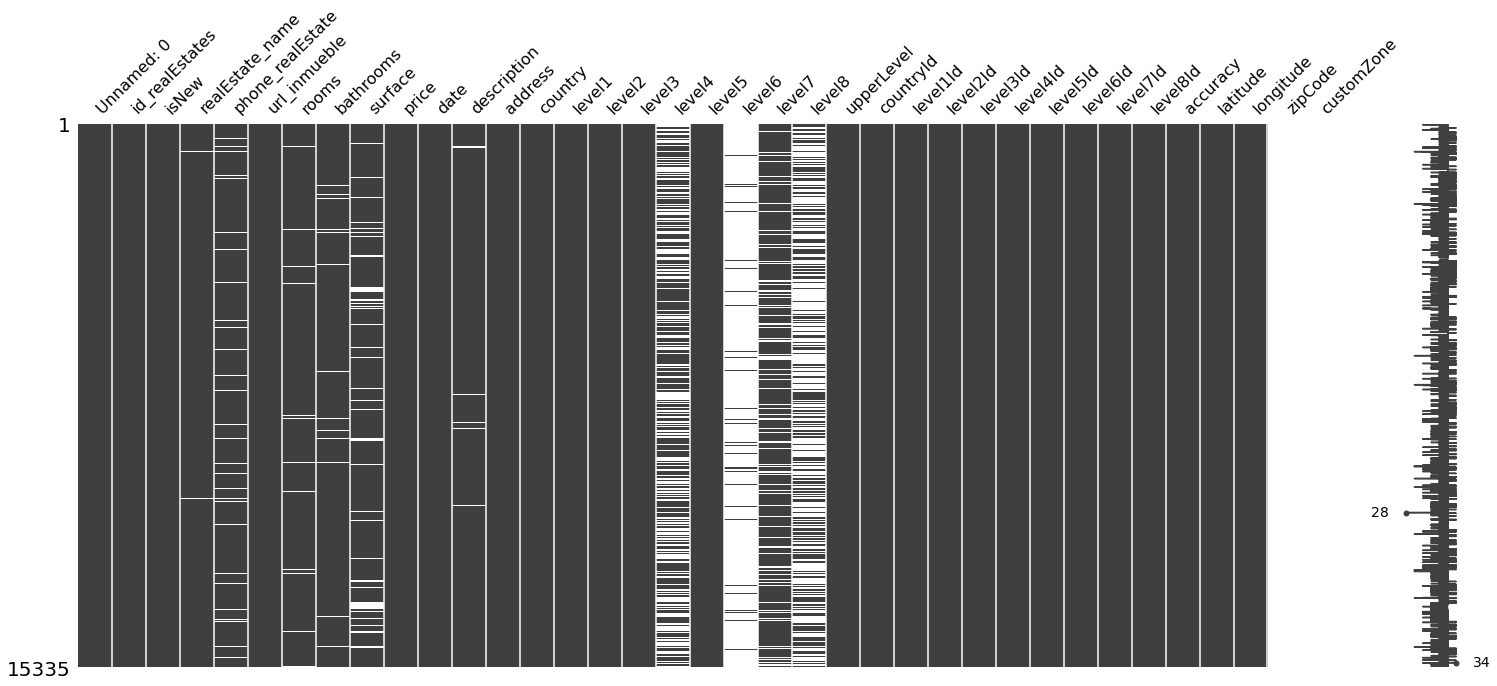

In [6]:
#Notas EP:
msno.matrix(ds) #Using the missingno library we can see if there are gaps in the information through a visualization

#Notes EP: Inlcude and abstract.

In [7]:
ds.info() ## For seeing the form of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

##Notas EP: Include an abstract, for example: As you can see in .info and shape
Analys data type
Analys non  - null
Compare 15335 all have ? What we could observe? 

In [8]:
ds.describe()

,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,zipCode,customZone
count,15335.000000,1.533500e+04,1.454100e+04,14982.000000,14990.000000,14085.000000,1.533500e+04,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.000000,0.0,0.0
mean,7668.000000,1.524371e+08,9.143423e+08,3.231611,2.150233,196.916436,4.773036e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166873,NaN,NaN
std,4426.977524,2.277286e+06,7.516036e+06,1.393106,1.292079,2182.758313,5.912942e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372875,NaN,NaN
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,3834.500000,1.519456e+08,9.113649e+08,2.000000,1.000000,80.000000,1.690000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
50%,7668.000000,1.532413e+08,9.121841e+08,3.000000,2.000000,114.000000,2.800000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
75%,11501.500000,1.538105e+08,9.148904e+08,4.000000,3.000000,205.000000,5.400000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
max,15335.000000,1.540033e+08,9.887761e+08,30.000000,20.000000,249000.000000,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,NaN


##Notes EP: Include an abstratct, Are there nan values? The column price have value in cero 0.000000e+00? What happen to this ? How is affected me the price wih ceros ? We could se the cheapest house ?  We could se the expensive house ?


In [52]:
ds.head(5) # Print the firts 5 lines

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [6]:
# Convert 'price' column to numeric, ignoring non-numeric values
ds['price'] = pd.to_numeric(ds['price'], errors='coerce')

# Drop rows with NaN values in the 'price' column
ds = ds.dropna(subset=['price'])

# Find the index of the most expensive home
most_expensive_index = ds['price'].idxmax()

# Get the details of the most expensive home using the index
most_expensive_home = ds.loc[most_expensive_index]

# Display the details of the most expensive home
print("Most Expensive Home:")
print("id_realEstates:", ds['price'].idxmax()) ## NOTA EP Include the number for search is more easy
print("Real Estate Agency:", most_expensive_home['realEstate_name'])
print("Price:", most_expensive_home['price'])
print("Location City:", most_expensive_home['level2'])
print("Location Zone:", most_expensive_home['level3'])
print("Location Zone of:", most_expensive_home['level4'])
print("# of bedrooms:", most_expensive_home['rooms'])
print("# of bathrooms:", most_expensive_home['bathrooms'])
print("Surface area:", most_expensive_home['surface'])

Most Expensive Home:
id_realEstates: 13110
Real Estate Agency: engel volkers torrelodones
Price: 8500000
Location City: Madrid
Location Zone: Zona Noroeste
Location Zone of: El Escorial, Zona de
# of bedrooms: 19.0
# of bathrooms: nan
Surface area: nan


#### What is cheapest home in the dataset? (★☆☆)

In [7]:
# Rows with price as zero
zero_price_count = (ds['price'] == 0).sum()
print("Number of Rows with Zero Prices:", zero_price_count)

Number of Rows with Zero Prices: 60


In [8]:
ds["price"].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
15330    True
15331    True
15332    True
15333    True
15334    True
Name: price, Length: 15335, dtype: bool

In [9]:
# EP If I were you I did in this form: Filter for rows with zero price EP notas and include not null 
home_price=ds[ds["price"]>0 & ds["price"].notnull()]

In [10]:
# Original R
#home_price = ds[[ds['price'] != 0] 

# First and second rows with the cheapest homes
cheapest = home_price[home_price['price'] == home_price['price'].min()]
second_cheapest_home = home_price.nsmallest(2, 'price').iloc[-1]

print("1st Cheapest Home:")
print("Real Estate Agency:", cheapest['realEstate_name'].values[0])
print("Id_Real state:",cheapest["price"].idxmin()) ## EP Include the id number
print("Price:", cheapest['price'].values[0])
print("Location City:", cheapest['level2'].values[0])
print("Location Zone:", cheapest['level3'].values[0])
print("Location Zone of:", cheapest['level4'].values[0])
print("# of bedrooms:", cheapest['rooms'].values[0])
print("# of bathrooms:", cheapest['bathrooms'].values[0])
print("Surface area:", cheapest['surface'].values[0])


print(" ")
print("2nd Cheapest Home:")
print("Real Estate Agency:", second_cheapest_home['realEstate_name'])
print("Price:", second_cheapest_home['price'])
print("Location City:", second_cheapest_home['level2'])
print("Location Zone:", second_cheapest_home['level3'])
print("Location Zone of:", second_cheapest_home['level4'])
print("# of bedrooms:", second_cheapest_home['rooms'])
print("# of bathrooms:", second_cheapest_home['bathrooms'])
print("Surface area:", second_cheapest_home['surface'])

1st Cheapest Home:
Real Estate Agency: redpiso coslada
Id_Real state: 7491
Price: 600
Location City: Madrid
Location Zone: Corredor del Henares
Location Zone of: Coslada, Zona de
# of bedrooms: 3.0
# of bathrooms: 1.0
Surface area: 80.0
 
2nd Cheapest Home:
Real Estate Agency: haya real estate
Price: 16200
Location City: Madrid
Location Zone: Corredor del Henares
Location Zone of: Los Santos, Zona de
# of bedrooms: 1.0
# of bathrooms: 1.0
Surface area: 68.0


##### What are the 5 cheapest homes?

In [11]:
cheapest_homes = home_price.nsmallest(5, 'price')
pd.DataFrame(cheapest_homes)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
7491,7492,153977752,False,redpiso coslada,910759552.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,80.0,600,2019-12-24T12:56:00Z,"REDPISO COSLADA alquila vivienda en Ciudad 70,...","Berlin, Coslada",España,Madrid,Madrid,Corredor del Henares,"Coslada, Zona de",Coslada,NaN,Ciudad 70,NaN,Ciudad 70,0,0,0,0,0,0,0,0,0,0,"40,41869","-3,54004",NaN,NaN
12233,12234,152327984,False,haya real estate,911228034.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,68.0,16200,2019-12-20T05:31:00Z,Vivienda unifamiliar adosada de 68 metros cuad...,"Mayor, Los Santos de la Humosa",España,Madrid,Madrid,Corredor del Henares,"Los Santos, Zona de",Los Santos de la Humosa,NaN,NaN,NaN,Los Santos de la Humosa,0,0,0,0,0,0,0,0,0,0,"40,50220687","-3,25763694",NaN,NaN
15099,15100,151611787,False,haya real estate,911227078.0,https://www.fotocasa.es/es/comprar/vivienda/ta...,1.0,1.0,68.0,16200,2019-12-18T02:45:00Z,Vivienda unifamiliar adosada de 68 metros cuad...,"Mayor, Los Santos de la Humosa",España,Madrid,Madrid,Corredor del Henares,"Los Santos, Zona de",Los Santos de la Humosa,NaN,NaN,NaN,Los Santos de la Humosa,0,0,0,0,0,0,0,0,0,0,"40,50220687","-3,25763694",NaN,NaN
10201,10202,150442392,False,hola pisos,935432140.0,https://www.fotocasa.es/vivienda/navalcarnero/...,NaN,NaN,128.0,20000,2019-12-22T05:20:00Z,"Casa a reformar en venta en Ambite, Madrid. Di...",Ambite,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Perales de Tajuña, Zona de",Ambite,NaN,NaN,NaN,Ambite,0,0,0,0,0,0,0,0,0,0,"40,32772","-3,18138",NaN,NaN
12628,12629,153410449,False,outletdeviviendas,912172269.0,https://www.fotocasa.es/es/comprar/vivienda/mi...,NaN,NaN,NaN,20000,2019-12-19T20:00:00Z,1 suelo rústico de 32500 m2. Uso mayoritario r...,Cenicientos,España,Madrid,Madrid,Zona Suroeste,Resto A5,Cenicientos,NaN,NaN,NaN,Cenicientos,0,0,0,0,0,0,0,0,0,0,"40,262627","-4,464905",NaN,NaN


##### Note: the same property (id_realestates 151611787) was accidently entered multiple times with different phone numbers.

#### What is the biggest and the smallest home in the dataset? (★☆☆)

Cleaning Data:

In [12]:
nan_count_surface = ds['surface'].isna().sum()
print("Number of NaN values in the 'surface' column:", nan_count_surface)

Number of NaN values in the 'surface' column: 1250


In [13]:
# Dropping NaNs from surface col
ds_clean = ds.dropna(subset=['surface'])

In [14]:
zero_surface_count = (ds_clean['surface'] == 0).sum()
print("Number of zero values in the 'surface' column:", zero_surface_count)

Number of zero values in the 'surface' column: 0


##### Biggest home

In [15]:
# Sort the surface column in descending order
ds_surface_sorted = ds_clean.sort_values(by='surface')

# Filter row with the largest surface area
biggest_home = ds_surface_sorted.iloc[-1]

# Filter row with the smallest surface area
smallest_home = ds_surface_sorted.iloc[0]

print("Details of surface area of biggest home:")
print("Real Estate Agency:", biggest_home['realEstate_name'])
print("Real Estate:",ds_clean['surface'].idxmax()) ##EP NOTES
print("Surface area:", biggest_home['surface'])
print("Price:", biggest_home['price'])
print("Location City:", biggest_home['level2'])
print("Location Zone:", biggest_home['level3'])
print("Location Zone of:", biggest_home['level4'])
print("# of bedrooms:", biggest_home['rooms'])
print("# of bathrooms:", biggest_home['bathrooms'])


Details of surface area of biggest home:
Real Estate Agency: habitarium inmobiliaria
Real Estate: 6794
Surface area: 249000.0
Price: 289000
Location City: Madrid
Location Zone: Zona Suroeste
Location Zone of: Sevilla la Nueva, Zona de
# of bedrooms: 3.0
# of bathrooms: 2.0


##### Top 5 biggest homes

In [16]:
largest_surface_homes = ds_surface_sorted.nlargest(5, 'surface')
pd.DataFrame(largest_surface_homes)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
6794,6795,153936192,False,habitarium inmobiliaria,916357732.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,249000.0,289000,2019-12-25T18:30:00Z,Zona Centro. Chalet pareado de esquina de 249m...,Sevilla la Nueva,España,Madrid,Madrid,Zona Suroeste,"Sevilla la Nueva, Zona de",Sevilla la Nueva,NaN,NaN,NaN,Sevilla la Nueva,0,0,0,0,0,0,0,0,0,0,"40,34633","-4,02174",NaN,NaN
12676,12677,153942565,False,montse,NaN,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,3.0,66666.0,389000,2019-12-19T19:00:00Z,NaN,"Calle Apd 4 Los Carrizos, 357, Arroyomolinos (...",España,Madrid,Madrid,Zona Suroeste,"Arroyomolinos, Zona de",Arroyomolinos (Madrid),NaN,Zona Bulevar y Europa,NaN,Zona Bulevar y Europa,0,0,0,0,0,0,0,0,0,1,"40,27977","-3,92413",NaN,NaN
14852,14853,152249752,False,deplace,910750918.0,https://www.fotocasa.es/es/comprar/vivienda/la...,NaN,NaN,16853.0,90000,2019-12-18T09:41:00Z,Presentamos esta estupenda finca que se encuen...,"Calle Paraje Monte de Valdeoliva, San Agustín ...",España,Madrid,Madrid,Zona Norte de Madrid,"San Agustín de Guadalix, Zona de",San Agustín del Guadalix,NaN,NaN,NaN,San Agustín del Guadalix,0,0,0,0,0,0,0,0,0,0,"40,6912092","-3,608836",NaN,NaN
8537,8538,142907825,False,remax jumbo,910758029.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,30.0,20.0,5504.0,790000,2019-12-23T17:25:00Z,"^^^^^ESPECTACULAR FINCA DE RECREO, EN LA SIERR...",Navarredonda,España,Madrid,Madrid,Zona Norte de Madrid,"La Sierra Norte, Zona de",Navarredonda,NaN,NaN,NaN,Navarredonda,0,0,0,0,0,0,0,0,0,0,"40,98879","-3,70811",NaN,NaN
1198,1199,142601805,False,sosdivar,914890914.0,https://www.fotocasa.es/es/comprar/vivienda/la...,6.0,3.0,5083.0,825000,2019-12-28T06:34:00Z,"Lujosa vivienda de 515 m2 , muros de granito, ...","Calle Canario 2 Los Ranchos, Galapagar",España,Madrid,Madrid,Zona Noroeste,"Galapagar, Zona de",Galapagar,NaN,Puerto de Galapagar - Las Cuestas,NaN,Puerto de Galapagar - Las Cuestas,0,0,0,0,0,0,0,0,0,1,"40,55249","-3,98827",NaN,NaN


##### Smallest home

In [17]:
print("Details of surface area of smallest home:")
print("Real Estate Agency:", smallest_home['realEstate_name'])
print("Real Estate:",ds_clean['surface'].idxmin()) ##EP NOTES
print("Surface area:", smallest_home['surface'])
print("Price:", smallest_home['price'])
print("Location City:", smallest_home['level2'])
print("Location Zone:", smallest_home['level3'])
print("Location Zone of:", smallest_home['level4'])
print("# of bedrooms:", smallest_home['rooms'])
print("# of bathrooms:", smallest_home['bathrooms'])

Details of surface area of smallest home:
Real Estate Agency: toledo21
Real Estate: 498
Surface area: 15.0
Price: 85000
Location City: Madrid
Location Zone: Madrid, Zona de
Location Zone of: nan
# of bedrooms: 1.0
# of bathrooms: 1.0


##### Top 5 smallest homes

In [18]:
smallest_surface_homes = ds_surface_sorted.nsmallest(5, 'surface')
pd.DataFrame(smallest_surface_homes)


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
498,499,152817874,False,toledo21,910757382.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,15.0,85000,2019-12-28T19:04:44.6433814Z,"¡NO BUSQUES MÁS, YA LA HAS ENCONTRADO! . \n \n...","Calle Amparo, Madrid Capital",España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Centro,Embajadores - Lavapiés,Embajadores - Lavapiés,0,0,0,0,0,0,0,0,0,0,"40,40818","-3,70192",NaN,NaN
14361,14362,153920125,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/al...,NaN,1.0,18.0,89000,2019-12-18T17:11:00Z,¡ OPORTUNIDAD ÚNICA! \n ¡IDEAL PARA INVERTIR! ...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Centro,Embajadores - Lavapiés,Embajadores - Lavapiés,0,0,0,0,0,0,0,0,0,0,"40,40733","-3,69876",NaN,NaN
15320,15321,153901533,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,NaN,1.0,18.0,89000,2019-12-17T18:26:00Z,¡ OPORTUNIDAD ÚNICA! \n ¡IDEAL PARA INVERTIR! ...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Centro,Embajadores - Lavapiés,Embajadores - Lavapiés,0,0,0,0,0,0,0,0,0,0,"40,40733","-3,69876",NaN,NaN
1888,1889,153989797,False,vivienda2,912188609.0,https://www.fotocasa.es/vivienda/madrid-capita...,NaN,1.0,21.0,169000,2019-12-28T03:10:00Z,Vivienda 2 pone a la venta este magnífico estu...,"Arquitectura, Madrid Capital",España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Arganzuela,Acacias,Acacias,0,0,0,0,0,0,0,0,0,0,"40,4002202213562","-3,70302392135624",NaN,NaN
9682,9683,153962563,False,haya real estate,911227078.0,https://www.fotocasa.es/es/comprar/vivienda/co...,1.0,1.0,21.0,94000,2019-12-23T04:56:00Z,Miniestudio situado en el Barrio Fuente el Ber...,"Los Peñascales, Madrid Capital",España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Salamanca,Fuente del Berro,Fuente del Berro,0,0,0,0,0,0,0,0,0,0,"40,42421257","-3,66674429",NaN,NaN


#### How many populations (level5) the dataset contains? (★☆☆)

In [19]:
# Get unique populations (level5)
unique_populations = ds['level5'].unique()

# Count number of unique populations
num_unique_populations = len(unique_populations)

print("Number of Unique Populations (level5):", num_unique_populations)

Number of Unique Populations (level5): 168


#### Does the dataset contain NAs? (★☆☆)


In [20]:
# Count number of missing values in the entire DataFrame
num_missing_values = ds.isna().sum().sum()

print("Number of Missing Values in the Dataset:", num_missing_values)

Number of Missing Values in the Dataset: 65690


In [21]:
# Count number of NaN values for each column
nan_counts = ds.isna().sum()

print("Number of NaN values for each column:")
print(nan_counts)

Number of NaN values for each column:
Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335


##Note EP: Include an abstract of the observation

#### Delete the NAs of the dataset, if applicable (★★☆)

Deleting NAs from the dataset will result in dropping all of the rows given there are entire columns with NaNs. For this exploratory analysis, dropping certain columns with NAs would result in a loss of valuable information. There is a mix of columns that contain valueable information for any given house. It would be better to drop NaNs when doing deep analysis for specific columns. 

In [22]:
## Note EP Delete NAN
# Como elimina todos los NaN cree un nuevo data frame para que quede almacenado ahi y continuo con el original
df_real_estate_drop =ds.dropna()
print(df_real_estate_drop)
#Verificar que queda en cero
df_real_estate_drop.isnull().sum()

Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []


Unnamed: 0          0.0
id_realEstates      0.0
isNew               0.0
realEstate_name     0.0
phone_realEstate    0.0
url_inmueble        0.0
rooms               0.0
bathrooms           0.0
surface             0.0
price               0.0
date                0.0
description         0.0
address             0.0
country             0.0
level1              0.0
level2              0.0
level3              0.0
level4              0.0
level5              0.0
level6              0.0
level7              0.0
level8              0.0
upperLevel          0.0
countryId           0.0
level1Id            0.0
level2Id            0.0
level3Id            0.0
level4Id            0.0
level5Id            0.0
level6Id            0.0
level7Id            0.0
level8Id            0.0
accuracy            0.0
latitude            0.0
longitude           0.0
zipCode             0.0
customZone          0.0
dtype: float64

#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [5]:
##NOTE EP Don't drop NAN but you filter so the result is the same 

arroyomolinos_data = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

mean_price_arroyomolinos = arroyomolinos_data['price'].mean()

print("Mean Price in Arroyomolinos (Madrid):", mean_price_arroyomolinos)


Mean Price in Arroyomolinos (Madrid): 294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

In [6]:
arroyomolinos_prices = arroyomolinos_data['price']

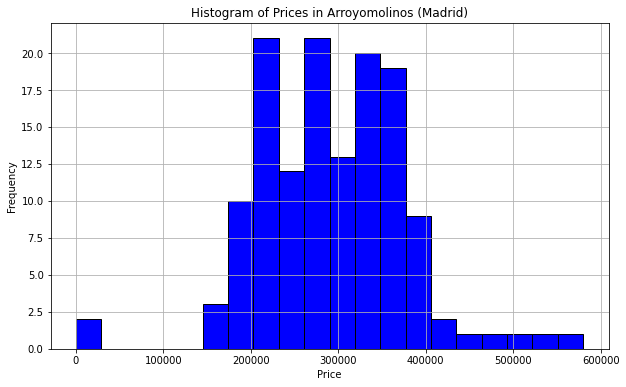

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(arroyomolinos_prices, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Prices in Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## NOTE EP What you observe the graph ???? Include an abstract 

#Information on the Gaussian bell https://jesusgarciaj.com/2010/01/22/la-curva-de-distribucion-normal/
It is observed that it behaves like a Gaussian bell where the mean is 3000 and the standard deviations are between 2000 and 4000.

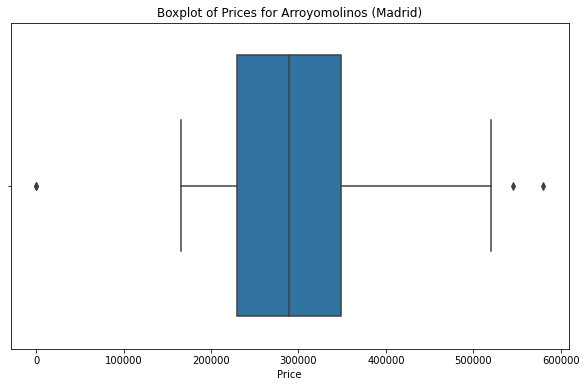

In [8]:
# Box and whisker plot of price distribution for Arroyomolinos
plt.figure(figsize=(10, 6))
sns.boxplot(x=arroyomolinos_prices)
plt.title('Boxplot of Prices for Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.show()

## NOTE EP BOXPLOT WHAT YOU OBSREVE ??? 

In [27]:
# Display descriptive statistics for the 'arroyomolinos_prices' DataFrame
print(arroyomolinos_prices.describe())

count       137.00000
mean     294541.59854
std       84183.51590
min           0.00000
25%      229900.00000
50%      289000.00000
75%      348900.00000
max      580000.00000
Name: price, dtype: float64


In [30]:
print("The median price in Arroyomolinos is", np.median(arroyomolinos_prices))

The median price in Arroyomolinos is 289000.0


The prices for homes from the Arroyomolinos (Madrid) population appears to have a positively skewed distribution where there are relatively fewer homes with higher prices that extend out to the right of the distribution. Majority of the home prices are clustered between approximately 170,000 and 400,000 euros. 

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [10]:
# List of populations to subset
populations_to_subset = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

# Create subset based on the list of populations
south_belt_subset = ds[ds['level5'].isin(populations_to_subset)]

In [11]:
south_belt_subset.head(3)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN


In [12]:
# Count rows for each population
population_counts = south_belt_subset['level5'].value_counts()

# Print the row count for each population
for population, count in population_counts.items():
    print(f"Population: {population}, # of houses: {count}")

Population: Getafe, # of houses: 290
Population: Fuenlabrada, # of houses: 233
Population: Leganés, # of houses: 194
Population: Alcorcón, # of houses: 190


#### Make a bar plot of the median of prices (★★★) 

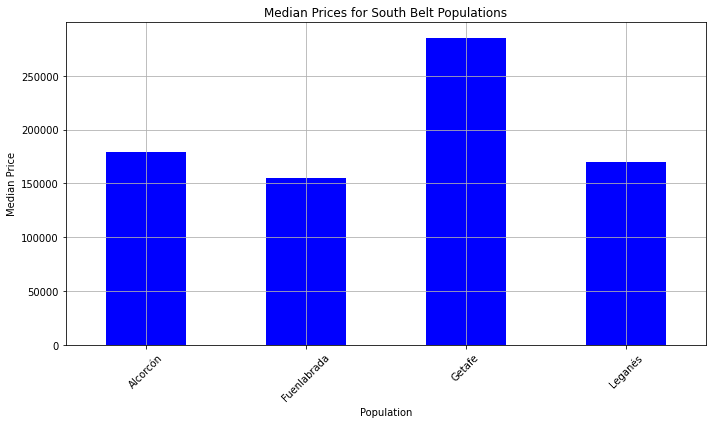

In [13]:
# Calculate median prices for each population
median_prices = south_belt_subset.groupby('level5')['price'].median()

# Bar plot
plt.figure(figsize=(10, 6))
median_prices.plot(kind='bar', color='blue')
plt.title('Median Prices for South Belt Populations')
plt.xlabel('Population')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## NOTE EP INCLUDE AN OBSERVATION 

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [32]:
# Calculate sample mean and variance for each variable in the south_belt_subset
mean_price = south_belt_subset['price'].mean()
variance_price = south_belt_subset['price'].var()

mean_rooms = south_belt_subset['rooms'].mean()
variance_rooms = south_belt_subset['rooms'].var()

mean_surface = south_belt_subset['surface'].mean()
variance_surface = south_belt_subset['surface'].var()

mean_bathrooms = south_belt_subset['bathrooms'].mean()
variance_bathrooms = south_belt_subset['bathrooms'].var()

print("Sample Mean and Variance for Price in South Belt Subset:")
print("Mean:", mean_price)
print("Variance:", variance_price)

print("\nSample Mean and Variance for Rooms in South Belt Subset:")
print("Mean:", mean_rooms)
print("Variance:", variance_rooms)

print("\nSample Mean and Variance for Surface Area in South Belt Subset:")
print("Mean:", mean_surface)
print("Variance:", variance_surface)

print("\nSample Mean and Variance for Bathrooms in South Belt Subset:")
print("Mean:", mean_bathrooms)
print("Variance:", variance_bathrooms)

Sample Mean and Variance for Price in South Belt Subset:
Mean: 223094.48070562293
Variance: 14921367508.04902

Sample Mean and Variance for Rooms in South Belt Subset:
Mean: 3.0177383592017737
Variance: 0.7188858892927542

Sample Mean and Variance for Surface Area in South Belt Subset:
Mean: 111.75222363405337
Variance: 4263.051760316337

Sample Mean and Variance for Bathrooms in South Belt Subset:
Mean: 1.633221850613155
Variance: 0.5717968625577321


In [33]:
# Calculate sample mean and variance for the specified variables in the south_belt_subset
variable_stats = south_belt_subset[['price', 'rooms', 'surface', 'bathrooms']].describe()

print("Sample Mean and Variance for Variables in South Belt Subset:")
print(variable_stats)

Sample Mean and Variance for Variables in South Belt Subset:
              price       rooms     surface   bathrooms
count  9.070000e+02  902.000000  787.000000  897.000000
mean   2.230945e+05    3.017738  111.752224    1.633222
std    1.221530e+05    0.847871   65.292050    0.756173
min    0.000000e+00    1.000000   38.000000    1.000000
25%    1.349450e+05    3.000000   72.000000    1.000000
50%    1.750000e+05    3.000000   89.000000    1.000000
75%    3.070500e+05    3.000000  128.000000    2.000000
max    1.050000e+06    7.000000  722.000000    6.000000


In [34]:
# EP propusal becouse the data presented is a little confuse

filtero_data = ds[ds['level5'].isin(
    ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
filtered = filtero_data [
    ['level5', 'price', 'rooms', 'surface', 'bathrooms']
]
grouped_filtered_data_frame = filtered.groupby('level5')
print("The mean of the variable is")
print(grouped_filtered_data_frame.mean())
print()
print()
print("The variance of the variable is")
print(grouped_filtered_data_frame.var())

The mean of the variable is
                     price     rooms     surface  bathrooms
level5                                                     
Alcorcón     230071.052632  2.914894  105.913295   1.623656
Fuenlabrada  177198.021459  3.025974  103.624365   1.445415
Getafe       265040.500000  3.151724  126.896266   1.865052
Leganés      208682.010309  2.906736  105.852273   1.518135


The variance of the variable is
                    price     rooms      surface  bathrooms
level5                                                     
Alcorcón     1.594783e+10  0.933895  4244.323834   0.592735
Fuenlabrada  4.701021e+09  0.355844  2264.643893   0.353367
Getafe       2.098267e+10  0.772748  5828.110028   0.658809
Leganés      1.191394e+10  0.824590  3987.475195   0.553055


#### What is the most expensive home of each population? (★★☆) 

In [14]:
# Iterate through each population and find the most expensive home
for population in populations_to_subset:
    population_data = south_belt_subset[south_belt_subset['level5'] == population]
    
    if not population_data.empty:
        most_expensive_home = population_data.loc[population_data['price'].idxmax()]
        print("Most Expensive Home in", population, ":")
        print("Price:", most_expensive_home['price'])
        print("Real Estate Name:", most_expensive_home['realEstate_name'])
        print("Rea Estate ID:", most_expensive_home['id_realEstates'])
        print("\n")
    else:
        print("No data for", population)

Most Expensive Home in Fuenlabrada :
Price: 490000
Real Estate Name: unna madrid
Rea Estate ID: 153660921


Most Expensive Home in Leganés :
Price: 650000
Real Estate Name: bafre gestion y servicios inmobiliarios
Rea Estate ID: 152251506


Most Expensive Home in Getafe :
Price: 1050000
Real Estate Name: unna grupo inmobiliario
Rea Estate ID: 151105544


Most Expensive Home in Alcorcón :
Price: 950000
Real Estate Name: 100 home red inmobiliaria
Rea Estate ID: 153275915




In [36]:
## EP propusal becouse the data presented is a little confuse
filtered = ds[ds['level5'].isin(
    ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
filtered= filtered[
    ['level5', 'price']
]
grouped_filtered_data_frame = filtered.groupby('level5')

maximo_index = grouped_filtered_data_frame.idxmax()
print()
print(f"The most expensive")
print(f"{maximo_index}")
print ()
print("The id of the most expensive houses are Alarcon id=5585, Funelabrada id=11561, Getafe id=2881 and Leganes id=10412")


print()
print()
print("The variance of the variable is")
print(grouped_filtered_data_frame.var())


The most expensive
             price
level5            
Alcorcón      5585
Fuenlabrada  11561
Getafe        2881
Leganés      10412

The id of the most expensive houses are Alarcon id=5585, Funelabrada id=11561, Getafe id=2881 and Leganes id=10412


The variance of the variable is
                    price
level5                   
Alcorcón     1.594783e+10
Fuenlabrada  4.701021e+09
Getafe       2.098267e+10
Leganés      1.191394e+10


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

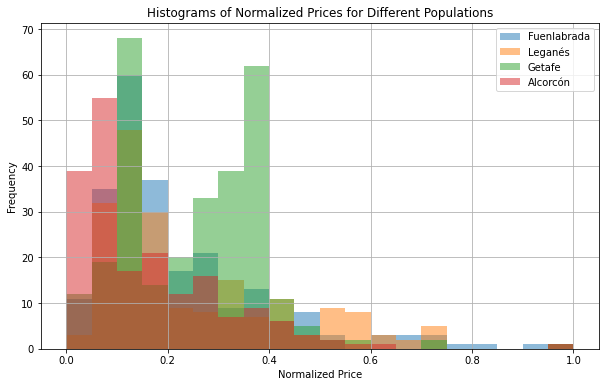

In [15]:
# Normalize the prices for each population
normalized_prices = south_belt_subset.groupby('level5')['price'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plotting histograms for normalized prices
plt.figure(figsize=(10, 6))
for population in populations_to_subset:
    plt.hist(normalized_prices[population], bins=20, alpha=0.5, label=population)

plt.title('Histograms of Normalized Prices for Different Populations')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## NOTE EP TRY TO DO SEPARATE IS A LITTLE CONFUSE

Analizando el nombre de la poblacion Fuenlabrada
1      0.000000
3      0.000000
161    0.375312
214    0.236908
Name: price, dtype: float64
Analizando el nombre de la poblacion Leganés
94     0.440678
189    0.000000
193    0.135593
272    0.335593
Name: price, dtype: float64
Analizando el nombre de la poblacion Getafe
169    0.276190
232    0.130857
233    0.129048
269    0.095143
Name: price, dtype: float64
Analizando el nombre de la poblacion Alcorcón
85     0.018055
109    0.388468
765    0.182295
816    0.241701
Name: price, dtype: float64


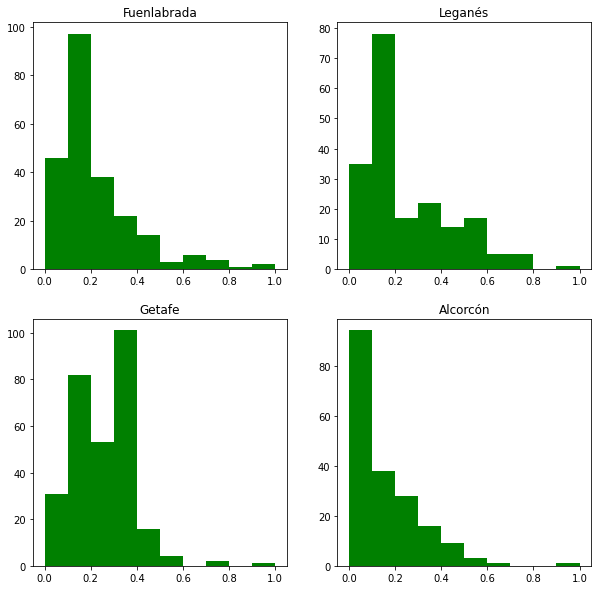

In [38]:
# One option

plt.figure (figsize =(10,10))
id_figura=1
nombre_poblacion = ds[ds['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
#Se aplica un for para recorre la lista e imprimir la grafica para cada una de ellas
for nombre_poblacion in ['Fuenlabrada', 'Leganés', 'Getafe','Alcorcón']:
    print('Analizando el nombre de la poblacion', nombre_poblacion)
    level5_fuen = ds['price'][ds['level5']==nombre_poblacion]
    max= level5_fuen.max()
    min= level5_fuen.min()
    price_normalize = level5_fuen - min
    price_normalize = price_normalize / (max-min)
    print (price_normalize.head(4))

    plt.subplot(2,2,id_figura)
    plt.hist(price_normalize, color='green')
    id_figura =id_figura +1
    plt.title (nombre_poblacion)

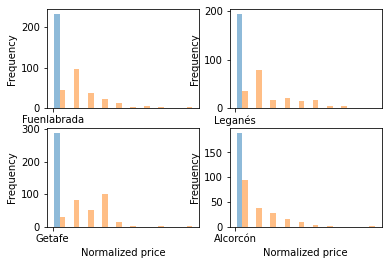

In [39]:
# FormA 2 de Normalizar
# Se define una funcion que se llama normalizacion para luego se aplicada
def normalize_price(ds: pd.DataFrame) -> pd.DataFrame:
    column = 'price'
    new_data_frame = ds.copy() 
    # Se aplica la funcion de normalizacion y = (x - min) / (max - min)
    new_data_frame[column] = (ds[column] - ds[column].min()) / \
        (ds[column].max() - ds[column].min())
    return new_data_frame

#Se filtra el data set con los filtros especificos
populations_to_filter = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')
filtered_data_frame = ds[ds['level5'].isin(populations_to_filter)]
filtered_data_frame = filtered_data_frame[['level5', 'price']]
population_specific_data_frames = [
    filtered_data_frame[filtered_data_frame['level5'] == population]
    for population in populations_to_filter
]
population_specific_data_frames = [
    normalize_price(ds)
    for ds in population_specific_data_frames
]

for index, population_data_frame in enumerate(population_specific_data_frames):
    plt.subplot(2, 2, index + 1)
    plt.xlabel('Normalized price')
    plt.ylabel('Frequency')
    plt.hist(population_data_frame, alpha=0.5,label=population_data_frame['level5'].iloc[0])

plt.show()

## NOTE EP ABSTRACT

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [16]:
# Determining the data types for lat and long cols
print(south_belt_subset[['latitude', 'longitude']].dtypes)

latitude     object
longitude    object
dtype: object


In [17]:
# Converting objects to floats for ipyleaflet map
south_belt_subset['latitude'] = south_belt_subset['latitude'].str.replace(',', '.').astype(float)
south_belt_subset['longitude'] = south_belt_subset['longitude'].str.replace(',', '.').astype(float)

/tmp/ipykernel_3379/1179373652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_subset['latitude'] = south_belt_subset['latitude'].str.replace(',', '.').astype(float)
/tmp/ipykernel_3379/1179373652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_subset['longitude'] = south_belt_subset['longitude'].str.replace(',', '.').astype(float)


In [18]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet


# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (40.317755279476394, -3.784103393554688), zoom = 12.0, 
    basemap=basemaps.Stamen.Terrain)
    
for index, row in south_belt_subset.iterrows():
    latitude = row["latitude"] 
    longitude = row["longitude"] 
    marker = CircleMarker(location=(latitude, longitude), radius=7,
                          color="blue", fill_color="blue", stroke_width=-500)
    map.add_layer(marker)
map

Map(center=[40.317755279476394, -3.784103393554688], controls=(ZoomControl(options=['position', 'zoom_in_text'…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [ ]:
# Filtering properties for Getafe and Alcorcon
getafe_properties = ds[ds['level5'] == 'Getafe'].copy()
alcorcon_properties = ds[ds['level5'] == 'Alcorcón'].copy()

# Calculating price per square meter for each property
getafe_properties['price_per_sqm'] = getafe_properties['price'] / getafe_properties['surface']
alcorcon_properties['price_per_sqm'] = alcorcon_properties.apply(lambda row: row['price'] / row['surface'] if row['surface'] > 0 else 0, axis=1)

# Calculating average price per square meter for each town
avg_price_per_sqm_getafe = getafe_properties['price_per_sqm'].mean()
avg_price_per_sqm_alcorcon = alcorcon_properties['price_per_sqm'].mean()

# Printing results
print("Average Price per Square Meter in Getafe:", avg_price_per_sqm_getafe)
print("Average Price per Square Meter in Alcorcón:", avg_price_per_sqm_alcorcon)

# Calculating absolute difference in average prices per square meter
price_sqm_difference = abs(avg_price_per_sqm_getafe - avg_price_per_sqm_alcorcon)


# Comparing average prices
if avg_price_per_sqm_getafe > avg_price_per_sqm_alcorcon:
    print("The average price per square meter in Getafe is higher than in Alcorcón.")
    print(f"The price difference is {price_sqm_difference:.2f} units.")

elif avg_price_per_sqm_getafe < avg_price_per_sqm_alcorcon:
    print("The average price per square meter in Alcorcón is higher than in Getafe.")
    print(f"The price difference is {price_sqm_difference:.2f} units.")

else:
    print("The average price per square meter is the same in both towns.")

In [271]:
num_rows_getafe = getafe_properties.shape[0]
num_rows_alcorcon = alcorcon_properties.shape[0]
print("Number of properties in Getafe subset:", num_rows_getafe)
print("Number of properties in Alcorcon subset:", num_rows_alcorcon)

Number of properties in Getafe subset: 290
Number of properties in Alcorcon subset: 190


In [4]:
## propusal EP TOO MUCH PERFORMANCE

def get_price_per_square_meter_info(ds: pd.DataFrame):
    return {
        'price_per_square_meter': {
                'average': ds['price_per_square_meter'].mean(),
                'median': ds['price_per_square_meter'].median(),
        }
    }

filtered_data_frame = ds[['level5', 'price', 'surface']]
populations_to_filter = ('Getafe', 'Alcorcón')
population_data_frames_dict = {
    population: filtered_data_frame[filtered_data_frame['level5'] == population].dropna()
    for population in populations_to_filter
}
price_per_square_meter_info_dict = {}
for population in population_data_frames_dict:
    population_data_frames_dict[population]['price_per_square_meter'] = \
        filtered_data_frame['price'] / filtered_data_frame['surface']
    price_per_square_meter_info = get_price_per_square_meter_info(
        ds=population_data_frames_dict[population])
    price_per_square_meter_info_dict[population] = price_per_square_meter_info

print(price_per_square_meter_info_dict)


print("Property in Getafe is on average cheaper than")
print("those found in Alcorcón per square meter")

{'Getafe': {'price_per_square_meter': {'average': 2066.314949251463, 'median': 1973.3333333333333}}, 'Alcorcón': {'price_per_square_meter': {'average': 2239.302480199618, 'median': 2207.7922077922076}}}
Property in Getafe is on average cheaper than
those found in Alcorcón per square meter


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [272]:
valdemorillo_properties = ds[ds['level5'] == 'Valdemorillo'].copy()
galapagar_properties = ds[ds['level5'] == 'Galapagar'].copy()

avg_price_valdemorillo = valdemorillo_properties['price'].mean()
avg_price_galapagar = galapagar_properties['price'].mean()

# Printing results
print("Average Price in Valdemorillo:", avg_price_valdemorillo)
print("Average Price in Galapagar:", avg_price_galapagar)

# Calculating absolute difference in average prices per square meter
price_difference = abs(avg_price_valdemorillo - avg_price_galapagar)


if avg_price_valdemorillo > avg_price_galapagar:
    print("The average price in Valdemorillo is higher than in Galapagar.")
    print(f"The price difference is {price_difference:.2f} units.")

elif avg_price_valdemorillo < avg_price_galapagar:
    print("The average price in Galapagar is higher than in Valdemorillo.")
    print(f"The price difference is {price_difference:.2f} euros.")

else:
    print("The average prices in Valdemorillo and Galapagar are the same.")

Average Price in Valdemorillo: 363860.2931034483
Average Price in Galapagar: 360063.20238095237
The average price in Valdemorillo is higher than in Galapagar.
The price difference is 3797.09 units.


In [5]:
## NOTE EP PROPUSAL 2
filtered_data_frame = ds[['level5', 'price']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_data_frames_dict = {
    population: filtered_data_frame[filtered_data_frame['level5'] == population].dropna()
    for population in populations_to_filter
}
valdemorillo_average_price = population_data_frames_dict[populations_to_filter[0]]['price'].mean()
galapagar_average_price = population_data_frames_dict[populations_to_filter[1]]['price'].mean()
print()
print(f"{populations_to_filter[0]} tiene un promedio de precio de  {valdemorillo_average_price}")
print(f"{populations_to_filter[1]} tiene un promedio de precio de  {galapagar_average_price}")
if valdemorillo_average_price == galapagar_average_price:
    print("If the average price is the same")
else:
    print("No the average is not the same")


Valdemorillo tiene un promedio de precio de  363860.2931034483
Galapagar tiene un promedio de precio de  360063.20238095237
No the average is not the same


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [273]:
# Calculating price per square meter for each property
valdemorillo_properties['price_per_sqm'] = valdemorillo_properties['price'] / valdemorillo_properties['surface']
galapagar_properties['price_per_sqm'] = galapagar_properties['price'] / galapagar_properties['surface']

# Calculate average price per square meter for each town
avg_price_per_sqm_valdemorillo = valdemorillo_properties['price_per_sqm'].mean()
avg_price_per_sqm_galapagar = galapagar_properties['price_per_sqm'].mean()

# Printing results
print("Average price per square meter in Valdemorillo:", avg_price_per_sqm_valdemorillo)
print("Average price per square meter in Galapagar:", avg_price_per_sqm_galapagar)

# Comparing average price per square meter
if avg_price_per_sqm_valdemorillo > avg_price_per_sqm_galapagar:
    print("The average price per square meter in Valdemorillo is higher than in Galapagar.")
elif avg_price_per_sqm_valdemorillo < avg_price_per_sqm_galapagar:
    print("The average price per square meter in Galapagar is higher than in Valdemorillo.")
else:
    print("The average price per square meter in Valdemorillo and Galapagar are the same.")

Average price per square meter in Valdemorillo: 1317.9502109024986
Average price per square meter in Galapagar: 1606.3240303094024
The average price per square meter in Galapagar is higher than in Valdemorillo.


In [6]:
## NOTE EP PROPUSAL 
filtered_data_frame = ds[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_data_frames_dict = {
    population: filtered_data_frame[filtered_data_frame['level5'] == population].dropna()
    for population in populations_to_filter
}
for population in population_data_frames_dict:
    population_data_frames_dict[population]['price_per_square_meter'] = \
        filtered_data_frame['price'] / filtered_data_frame['surface']

valdemorillo_average_price_per_square_meter = \
    population_data_frames_dict[populations_to_filter[0]]['price_per_square_meter'].mean()
galapagar_average_price_per_square_meter = \
    population_data_frames_dict[populations_to_filter[1]]['price_per_square_meter'].mean()

print()
to_print = f"{populations_to_filter[0]} has an average price per square meter of "
to_print += f"{valdemorillo_average_price_per_square_meter}"
print(to_print)
to_print = f"{populations_to_filter[1]} has an average price per square meter of "
to_print += f"{galapagar_average_price_per_square_meter}"
print(to_print)
if valdemorillo_average_price_per_square_meter == galapagar_average_price_per_square_meter:
    print("Yes, both have the same average price per square meter.")
else:
    print("Its average price per square meter is NOT the same")
print()


Valdemorillo has an average price per square meter of 1317.9502109024984
Galapagar has an average price per square meter of 1606.3240303094024
Its average price per square meter is NOT the same



#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

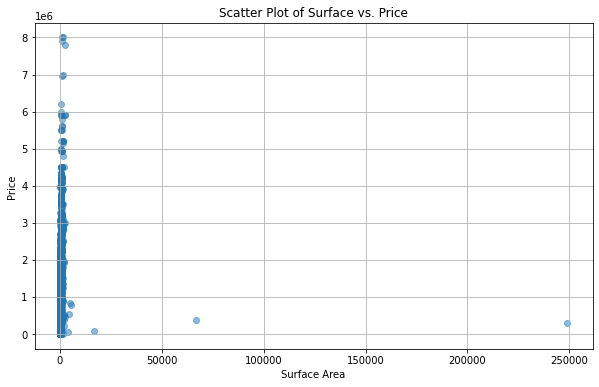

In [7]:
# Filtering data to exclude rows with missing values in 'surface' or 'price'
filtered_data = ds.dropna(subset=['surface', 'price'])

# Creating scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['surface'], filtered_data['price'], alpha=0.5)
plt.title('Scatter Plot of Surface vs. Price')
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In this plot we find outlier domination making it difficult to observe the distribution and patterns of the majority of the data points, as the presence of these extreme outliers distort the scale of the plot. 

Removing the outliers:

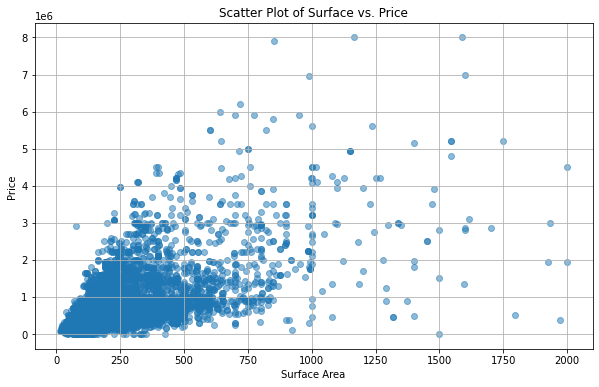

In [8]:
# Defining threshold for surface area to filter outliers
max_surface_threshold = 2000

# Filtering data to exclude outliers
filtered_data = filtered_data[filtered_data['surface'] <= max_surface_threshold]

# Creating scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['surface'], filtered_data['price'], alpha=0.5)
plt.title('Scatter Plot of Surface vs. Price')
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Upon removing the outliers, we observe a non-linear relationship where the relationship between surface area and price is not simply linear and follow a more complex pattern. There might be a "sweet spot" or threshold value for surface area beyond which the increase in price becomes less pronounced where buyers are willing to pay a premium up to a certain surface area, beyond which the value of additional space diminishes. The shape of the plots suggests the plots are influenced by the composition of the dataset given the dataset likely includes a wide range of properties from different market segments. Other factors, such as location, ameninites or property condition, interacts with the surface area to influence price. 

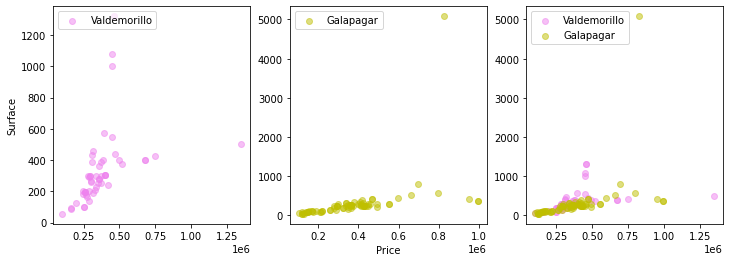

The comparison of the surface and the price between Valdemorillo and Galapagar seems that at the beginning they are similar, joining the points as a line
Then they dissipate and Valdemorillo grows exponentially faster, even having some outliers.


In [9]:
#NOTE PROPUSAL  EP
filtered_data_frame = ds[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar')
population_data_frames_dict = {
    population: filtered_data_frame[filtered_data_frame['level5'] == population].dropna()
    for population in populations_to_filter
}

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.ylabel('Surface')
plt.scatter(population_data_frames_dict[populations_to_filter[0]]['price'],
    population_data_frames_dict[populations_to_filter[0]]['surface'],
    alpha=0.5, label=populations_to_filter[0], color='violet')
plt.legend(loc='upper left')
plt.subplot(1, 3, 2)
plt.scatter(population_data_frames_dict[populations_to_filter[1]]['price'],
    population_data_frames_dict[populations_to_filter[1]]['surface'],
    alpha=0.5, label=populations_to_filter[1],color='y')
plt.legend(loc='upper left')
plt.xlabel('Price')
plt.subplot(1, 3, 3)
plt.scatter(population_data_frames_dict[populations_to_filter[0]]['price'],
    population_data_frames_dict[populations_to_filter[0]]['surface'], alpha=0.5,
    label=populations_to_filter[0],color='violet')
plt.scatter(population_data_frames_dict[populations_to_filter[1]]['price'],
    population_data_frames_dict[populations_to_filter[1]]['surface'], alpha=0.5,
    label=populations_to_filter[1], color='y')
plt.legend(loc='upper left')
plt.show()

print("The comparison of the surface and the price between Valdemorillo and Galapagar seems that at the beginning they are similar, joining the points as a line")
print("Then they dissipate and Valdemorillo grows exponentially faster, even having some outliers.")

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

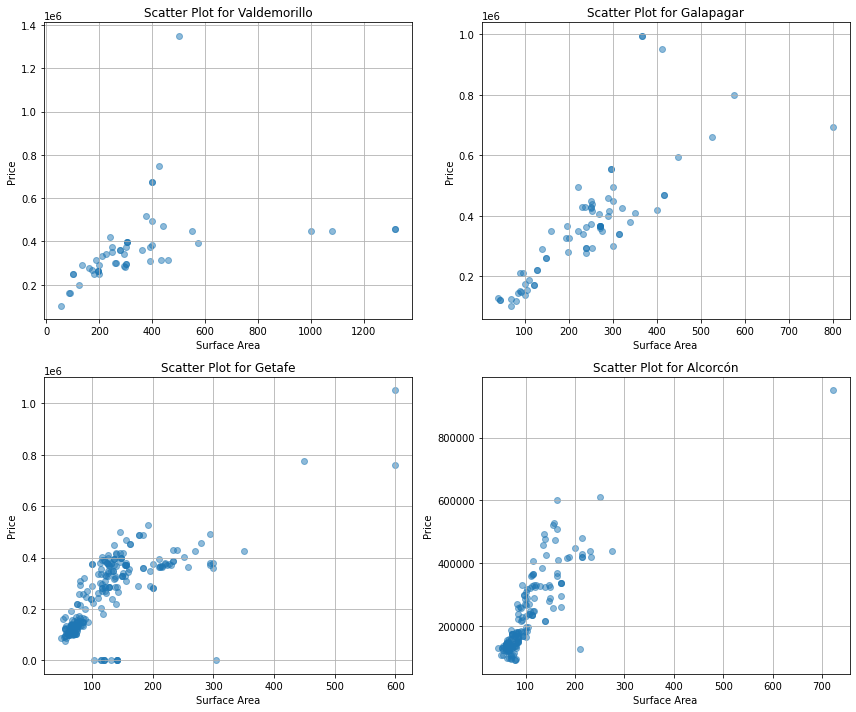

In [10]:
# List of populations to analyze
populations_to_analyze = ['Valdemorillo', 'Galapagar', 'Getafe', 'Alcorcón']

# Create subplots for each pop
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, population in enumerate(populations_to_analyze):
    population_data = filtered_data[filtered_data['level5'] == population]
    axs[i].scatter(population_data['surface'], population_data['price'], alpha=0.5)
    axs[i].set_title(f'Scatter Plot for {population}')
    axs[i].set_xlabel('Surface Area')
    axs[i].set_ylabel('Price')
    axs[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [11]:
# Count the number of rows for each population to determine the sample size for the populations
population_counts = filtered_data['level5'].value_counts()

# Print the number of rows for each population in populations_to_analyze
for population in populations_to_analyze:
    num_rows = population_counts.get(population, 0) 
    print(f"Number of rows for {population}: {num_rows}")

Number of rows for Valdemorillo: 53
Number of rows for Galapagar: 74
Number of rows for Getafe: 241
Number of rows for Alcorcón: 173


In the case of Getafe, Alcorcon and to an extent, Valdemorillo, we observe a fan-shaped heteroscedasticity indicating that the variability of price increases as the surface area increases. As the surface area increases, the prices of the properties become more spread out or dispersed, resulting in thicker density in the middle and end of the trend line where the relationsip is not constant across all levels of surface area. 



/tmp/ipykernel_3028/579039429.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, index + 1)


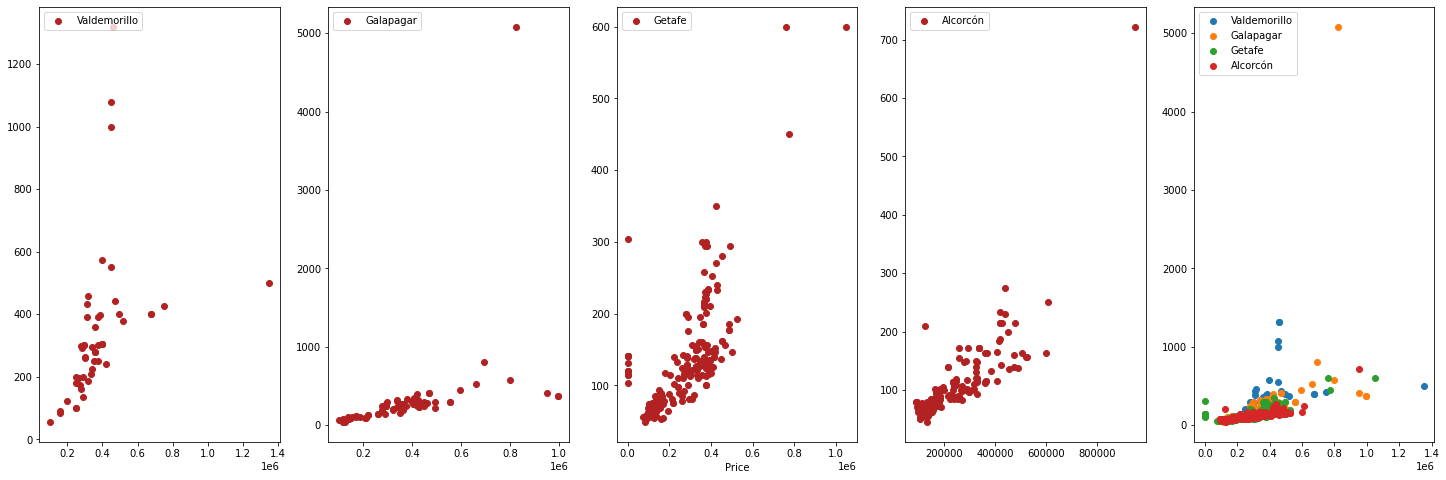

In [12]:
##Propusal code EP
filtered_data_frame = ds[['level5', 'price', 'surface']]
populations_to_filter = ('Valdemorillo', 'Galapagar', 'Getafe', 'Alcorcón')
population_data_frames_dict = {
    population: filtered_data_frame[filtered_data_frame['level5'] == population].dropna()
    for population in populations_to_filter
}

plt.figure(figsize=(25, 8))
plt.ylabel('Surface')

for index, population in enumerate(populations_to_filter):
    plt.subplot(1, 5, index + 1)
    plt.scatter(population_data_frames_dict[populations_to_filter[index]]['price'],
        population_data_frames_dict[populations_to_filter[index]]['surface'],
        label=populations_to_filter[index], color='firebrick')
    plt.legend(loc='upper left')
    plt.subplot(1, 5, 5)
    plt.scatter(population_data_frames_dict[populations_to_filter[index]]['price'],
        population_data_frames_dict[populations_to_filter[index]]['surface'],
        label=populations_to_filter[index])

plt.subplot(1, 5, 5)
plt.legend(loc='upper left')
plt.subplot(1, 5, 3)
plt.xlabel('Price')
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

##NOTA EP CORREGIR DIFFERENT VALUE

In [13]:
# Calculate the number of unique real estate agencies
num_unique_agencies = ds['realEstate_name'].nunique()

print("Number of unique real estate agencies:", num_unique_agencies)

Number of unique real estate agencies: 1821


In [22]:
print(ds['realEstate_name'].head(100))

0                        ferrari 57 inmobiliaria
1              tecnocasa fuenlabrada ferrocarril
2                             look find boadilla
3              tecnocasa fuenlabrada ferrocarril
4                        ferrari 57 inmobiliaria
                         ...                    
95    jacqueline alvarez servicios inmobiliarios
96                 arqlia propiedades singulares
97                          soluciones tengacasa
98                    aj servicios inmobiliarios
99                             gilmar mirasierra
Name: realEstate_name, Length: 100, dtype: object


In [14]:
## Propusal note EP RESULT 14217 Becaouse have name duplicate 
grouped_filtered = ds.groupby(['id_realEstates'])
grouped_filtered = grouped_filtered['id_realEstates']
print(len(grouped_filtered.size()))

14217


In [24]:
print(grouped_filtered)

#### What is the population (level 5) that contains the most houses? (★★☆) 

In [25]:
# Group the data by 'level5Id' and count occurrences
population_counts = ds['level5'].value_counts()

print(population_counts)


level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Brea de Tajo               1
El Atazar                  1
Piñuécar-gandullas         1
Braojos                    1
Montejo de la Sierra       1
Name: count, Length: 168, dtype: int64


In [26]:
# Get population with the highest count
most_common_population = population_counts.idxmax()
print("Population (level 5) with the most houses:", most_common_population)

Population (level 5) with the most houses:  Madrid Capital


#### Analysis of Top 10 populations with most properties

##### Top populations by property count

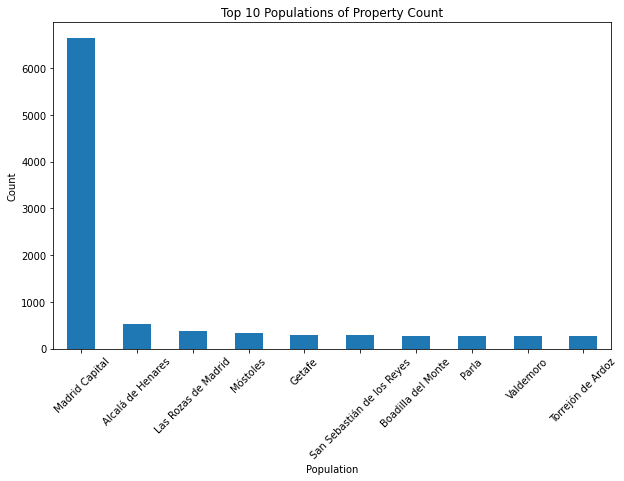

In [27]:
house_counts = ds['level5'].value_counts()
# Top 10 population of property count
top_n = 10 

top_populations = population_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_populations.plot(kind='bar')
plt.title(f'Top {top_n} Populations of Property Count')
plt.xlabel('Population')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### Frequency & Price Distribution of Top 10

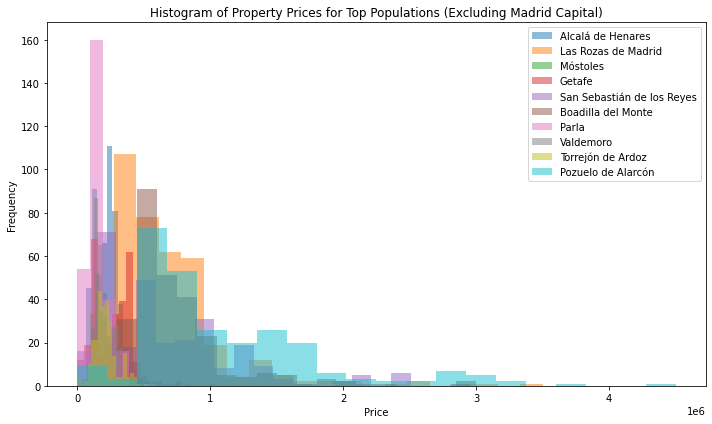

In [28]:
top_n = 10  # Top 10 populations of property count
top_populations = ds['level5'].value_counts().head(top_n + 1).index
top_populations_nomad = top_populations[top_populations != ' Madrid Capital']  # Exclude " Madrid Capital"
subset = ds[ds['level5'].isin(top_populations)]

plt.figure(figsize=(10, 6))
ax = plt.gca()

# Iterating through each population and creating a histogram on the same axis
for population in top_populations_nomad:
    population_data = subset[subset['level5'] == population]
    plt.hist(population_data['price'], bins=20, alpha=0.5, label=population)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Property Prices for Top Populations (Excluding Madrid Capital)')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
top_n = 10  # Top 10 populations of property count
top_populations = ds['level5'].value_counts().head(top_n + 1).index
subset = ds[ds['level5'].isin(top_populations)]

# Calculating the total number of properties in the top populations
total_properties_in_top_populations = subset.shape[0]
print("Total properties in top 10 populations:", total_properties_in_top_populations)

Total properties in top 10 populations: 9775


##### Median price for Top 10

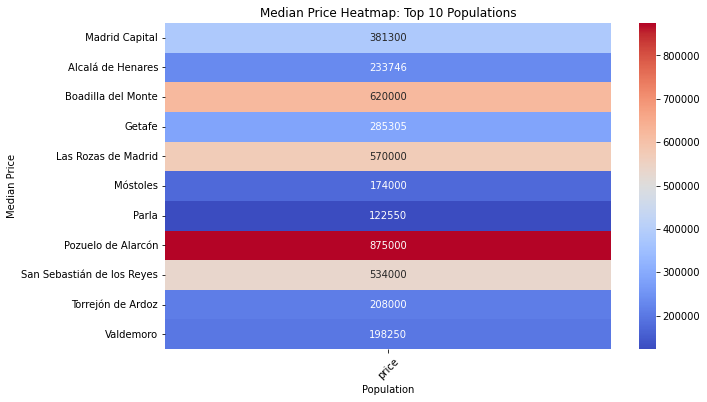

In [30]:
# Pivot table to calculate the median price for each population
pivot_table = subset.pivot_table(index='level5', values='price', aggfunc='median')

# Heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Median Price Heatmap: Top 10 Populations')
plt.xlabel('Population')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

##### Observe the price outliers

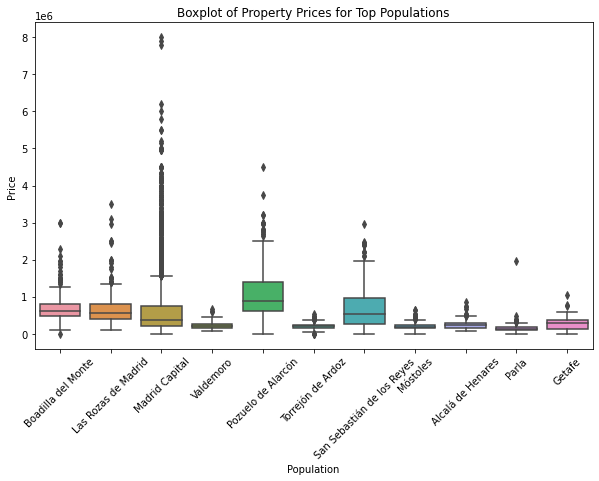

In [31]:
# Creating boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset, x='level5', y='price')
plt.title('Boxplot of Property Prices for Top Populations')
plt.xlabel('Population')
plt.ylabel('Price')
plt.xticks(rotation=45)
# Setting y-axis to log scale
plt.show()

#### Real Estate Agency Analysis

In [32]:
top_agencies = ds['realEstate_name'].value_counts().head(10)

print("Top Real Estate Agencies based on Property Count:")
print(top_agencies)

Top Real Estate Agencies based on Property Count:
realEstate_name
engel volkers madrid                    470
infocasa consulting                     300
outletdeviviendas                       260
housell                                 250
solvia inmobiliaria                     207
vivienda2                               198
deplace                                 194
servihabitat servicios inmobiliarios    185
aproperties                             184
altamira                                179
Name: count, dtype: int64


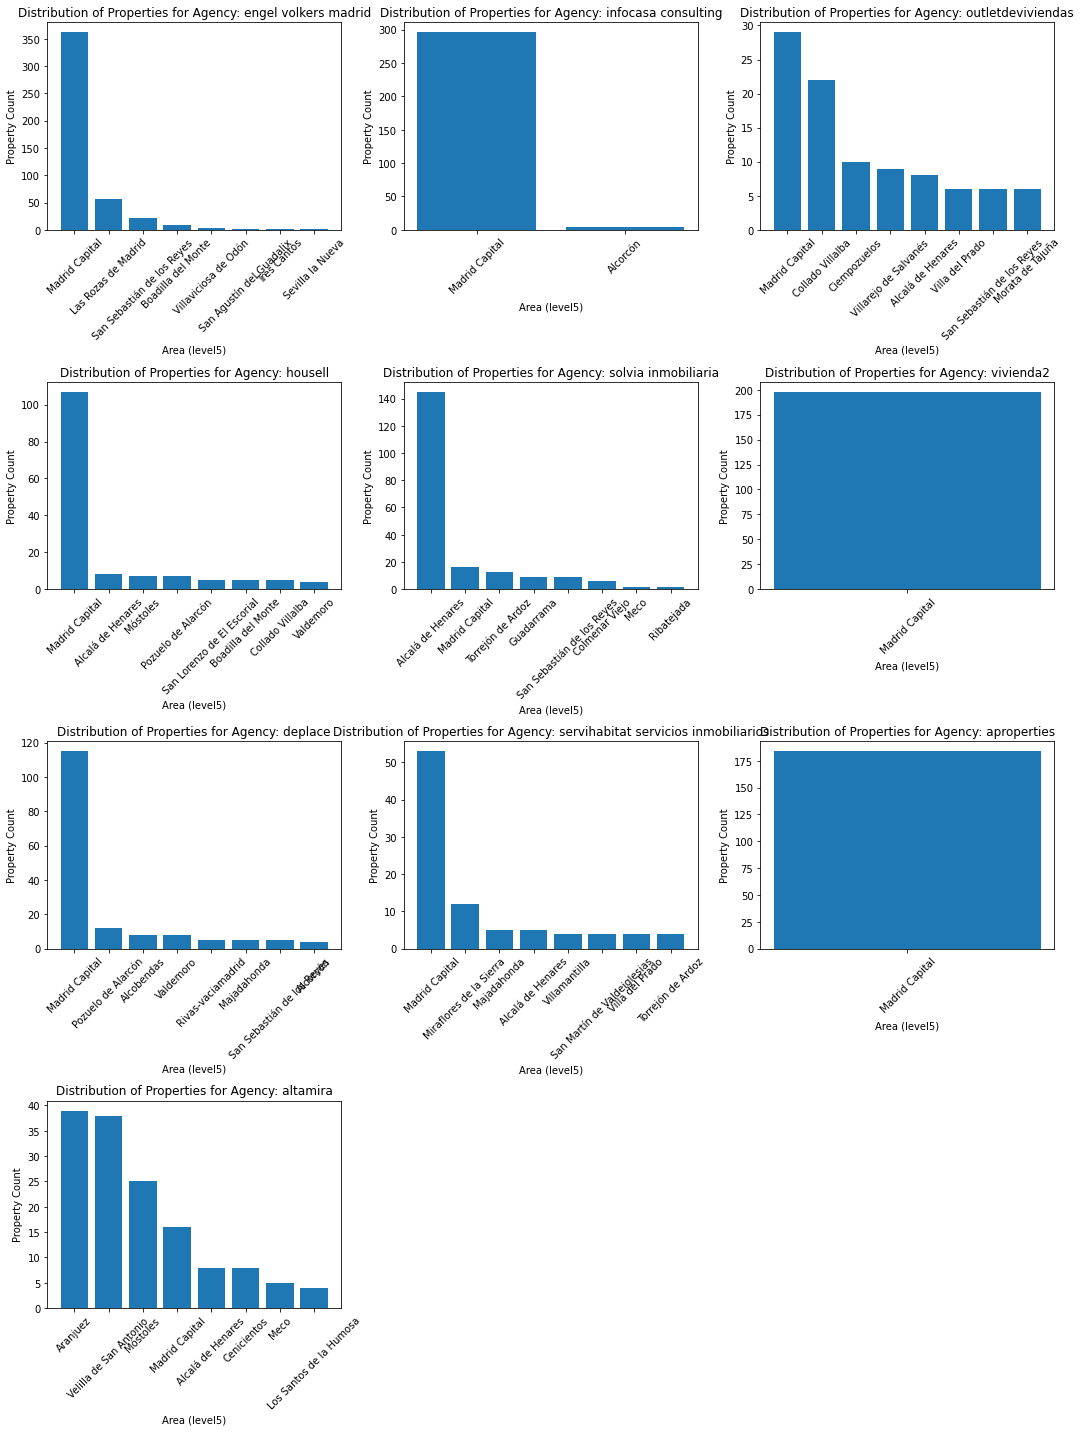

In [33]:
top_agencies = ['engel volkers madrid', 'infocasa consulting', 'outletdeviviendas', 'housell',
                'solvia inmobiliaria', 'vivienda2', 'deplace', 'servihabitat servicios inmobiliarios',
                'aproperties', 'altamira']

# Creating a figure with subplots
num_rows = (len(top_agencies) + 2) // 3  # Calculate the number of rows for subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axs = axs.ravel()

# Iterating through top agencies
for i, agency in enumerate(top_agencies):
    agency_data = ds[ds['realEstate_name'] == agency]
    area_counts = agency_data['level5'].value_counts().reset_index()
    area_counts.columns = ['Area', 'Property Count']

    # Limiting number of locations
    top_n_locations = 8  
    area_counts = area_counts.head(top_n_locations)

    # Creating bar plot
    axs[i].bar(area_counts['Area'], area_counts['Property Count'])
    axs[i].set_title(f'Distribution of Properties for Agency: {agency}')
    axs[i].set_xlabel('Area (level5)')
    axs[i].set_ylabel('Property Count')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].tick_params(axis='y')

# Hiding any empty subplots
for j in range(len(top_agencies), num_rows * 3):
    axs[j].axis('off')

# Adjusting spacing between subplots
plt.tight_layout()
plt.show()

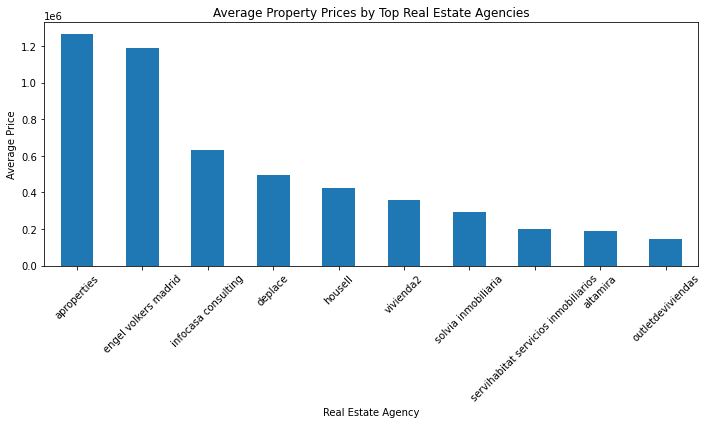

In [34]:
# Filtering the dataset for the top agencies
top_agency_data = ds[ds['realEstate_name'].isin(top_agencies)]

# Calculating average prices for each top real estate agency
top_agency_avg_prices = top_agency_data.groupby('realEstate_name')['price'].mean().sort_values(ascending=False)

# Creating bar plot for average prices of top agencies
plt.figure(figsize=(10, 6))
top_agency_avg_prices.plot(kind='bar')
plt.title('Average Property Prices by Top Real Estate Agencies')
plt.xlabel('Real Estate Agency')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Correlation between top agency properties and attributes

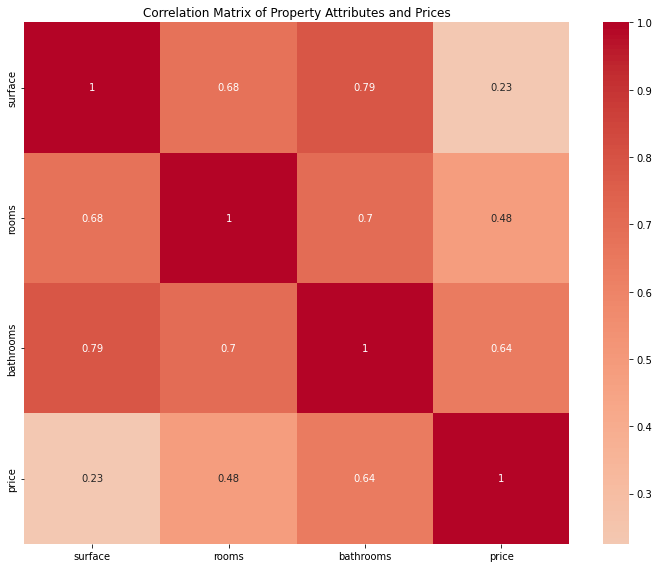

In [35]:
top_agencies = ['engel volkers madrid', 'infocasa consulting', 'outletdeviviendas', 'housell',
                'solvia inmobiliaria', 'vivienda2', 'deplace', 'servihabitat servicios inmobiliarios',
                'aproperties', 'altamira']
                
agency_data = ds[ds['realEstate_name'].isin(top_agencies)]

# Select property attributes and price
property_attributes = ['surface', 'rooms', 'bathrooms', 'price']
agency_data = agency_data[property_attributes]

# Calculating correlation matrix
correlation_matrix = agency_data.corr()

# Creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Property Attributes and Prices')
plt.tight_layout()
plt.show()

##### Correlation between all properties and attributes

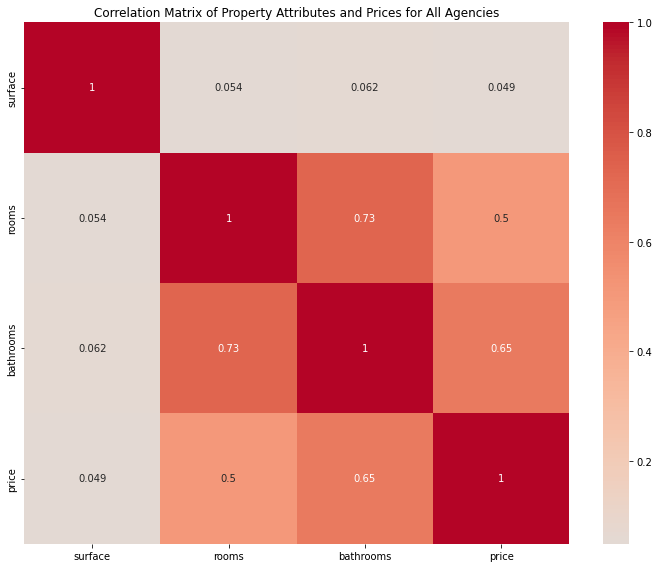

In [36]:
property_attributes = ['surface', 'rooms', 'bathrooms', 'price']
agency_data = ds[property_attributes]

# Calculating correlation matrix
correlation_matrix = agency_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Property Attributes and Prices for All Agencies')
plt.tight_layout()
plt.show()

##### Analyzing surface area of all properties

In [37]:
missing_surface_count = subset['surface'].isnull().sum()
print("Number of missing values in the 'surface' column:", missing_surface_count)

Number of missing values in the 'surface' column: 655


In [38]:
subset_filtered = subset[subset['surface'] <= 1000]
count_filtered = subset_filtered.shape[0]
print("Count of properties with surface areas less than or equal to 1000:", count_filtered)

Count of properties with surface areas less than or equal to 1000: 9079


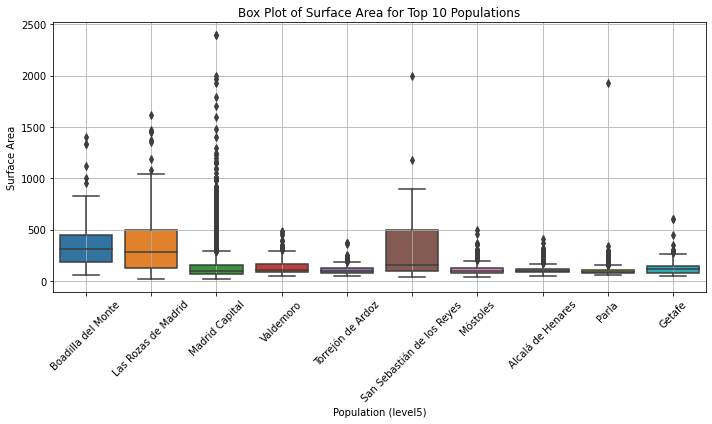

In [39]:
top_n = 10  
top_populations = ds['level5'].value_counts().head(top_n).index
subset = ds[ds['level5'].isin(top_populations)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=subset, x='level5', y='surface')
plt.title('Box Plot of Surface Area for Top 10 Populations')
plt.xlabel('Population (level5)')
plt.ylabel('Surface Area')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

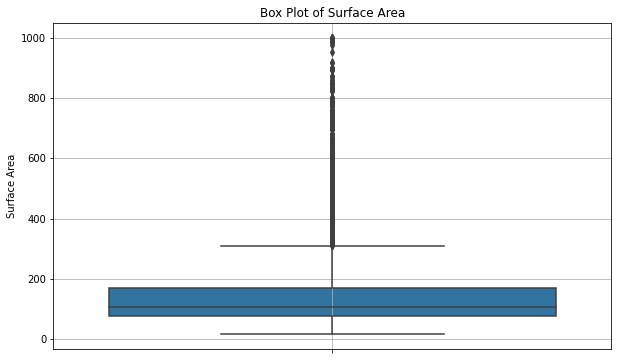

In [40]:
subset_filtered = subset[subset['surface'] <= 1000]

plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_filtered, y='surface')
plt.title('Box Plot of Surface Area')
plt.ylabel('Surface Area')
plt.grid(True)
plt.show()

In [41]:
# Defining surface area ranges
surface_ranges = [(0, 25), (25, 50), (50, 75), (75, 85), (85, 100), (100, 125), (125, 150), (150, 250), (250, 500), (500, 750), (750, 1000)]

# Creating new column based on the defined ranges
subset['surface_range'] = pd.cut(subset['surface'], bins=[start for start, end in surface_ranges] + [float('inf')], right=False)

# Calculating count of properties for each 'surface_range'
count_by_surface_range = subset['surface_range'].value_counts(dropna=False).sort_index()
print(count_by_surface_range)


surface_range
[0.0, 25.0)          9
[25.0, 50.0)       398
[50.0, 75.0)      1694
[75.0, 85.0)       857
[85.0, 100.0)     1150
[100.0, 125.0)    1321
[125.0, 150.0)     817
[150.0, 250.0)    1304
[250.0, 500.0)     981
[500.0, 750.0)     243
[750.0, inf)       119
NaN                623
Name: count, dtype: int64


/tmp/ipykernel_3028/17306765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['surface_range'] = pd.cut(subset['surface'], bins=[start for start, end in surface_ranges] + [float('inf')], right=False)


https://github.com/rbaset5/realestate-datacleanup-exercise/blob/master/notebooks/Project.ipynb